##**Import**

In [1]:
from keras.datasets import mnist
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import random
from time import time
from tensorflow.keras import layers
from sklearn.model_selection import KFold
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches





(x_train,y_train),(x_test,y_test)=mnist.load_data()

##Vue des données

TypeError: ignored

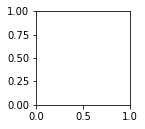

In [12]:
import matplotlib.pyplot as plt

def plot_digits(nombre):
  plt.figure(figsize=(10,10))
  for i in range(1,nombre):
    plt.subplot(5, 5, i)
    plt.imshow(x_train, cmap=plt.cm.binary)
  plt.show()

plot_digits(50)

## **Hierarchy**

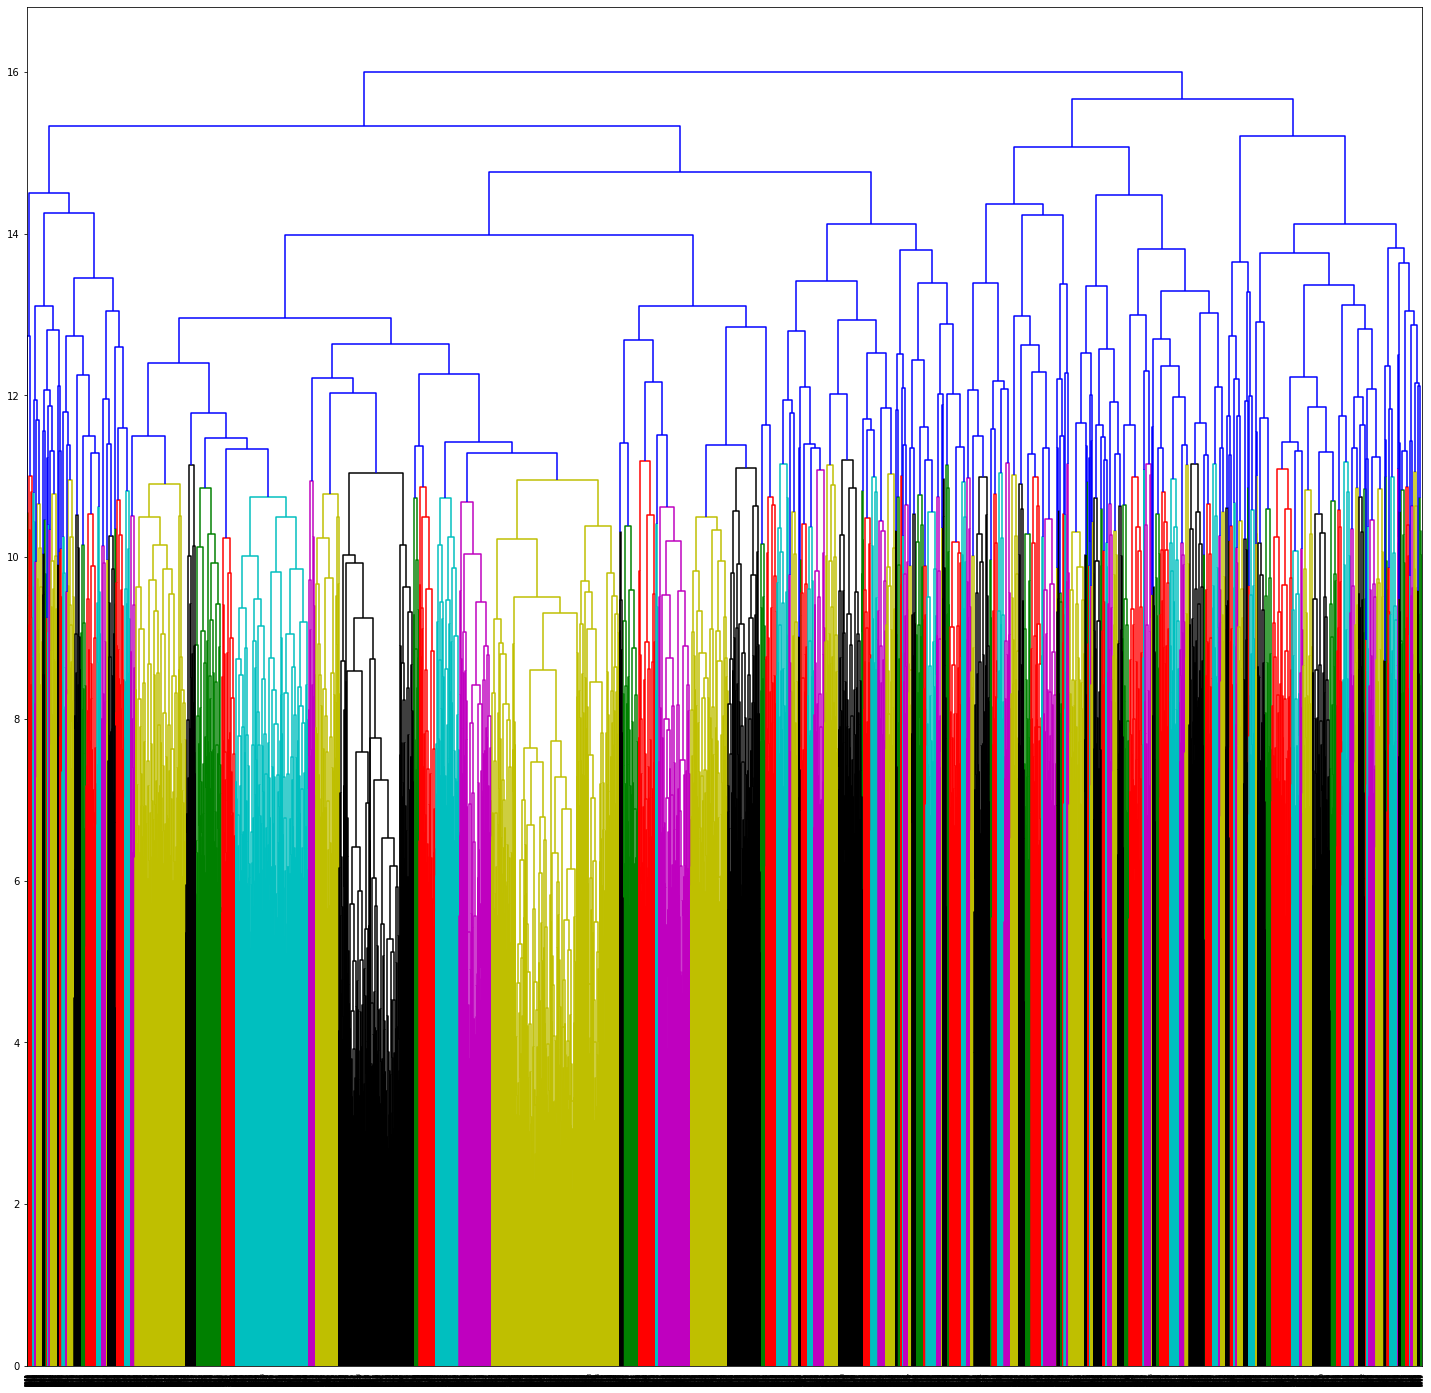

In [ ]:
from scipy import cluster

X1 = x_train.reshape(len(x_train),-1)
y = y_train

x_train2=x_train[:10000]
X2=x_train2.reshape(len(x_train2),-1)

y=y_train[:10000]

X = X2.astype(float) / 255.0


Z = cluster.hierarchy.linkage(X, "complete")
fig = plt.figure(figsize=(25, 25))
dn = cluster.hierarchy.dendrogram(Z);

## K-moyenne

### 10 clusters : 1 pour chaque label

10000
[5 0 6 1 9 7 1 7 1 7 7 1 3 6 1 7 3 7 5 7 9 0 7 1 3 1 7 0 7 1 3 1 6 7 0]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0]
Plotting for label 0


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f14746679e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt


Plotting for label 1
Plotting for label 2
Plotting for label 3
Plotting for label 4
Plotting for label 5
Plotting for label 6
Plotting for label 7
Plotting for label 8
Plotting for label 9


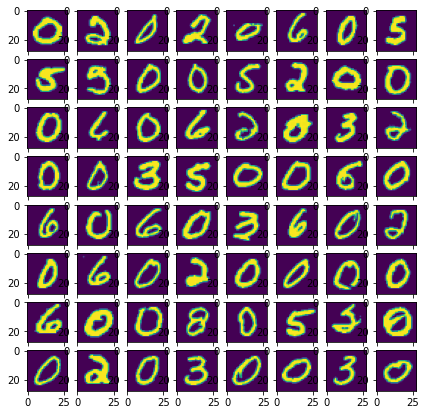

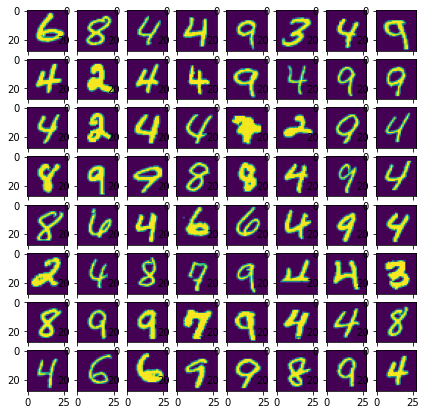

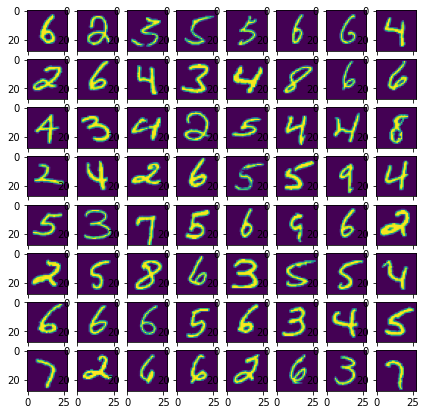

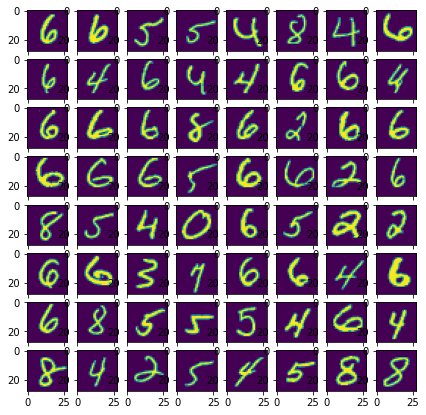

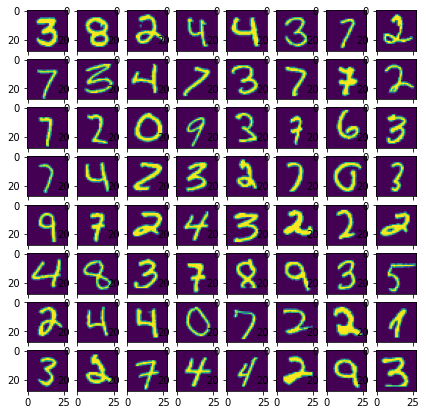

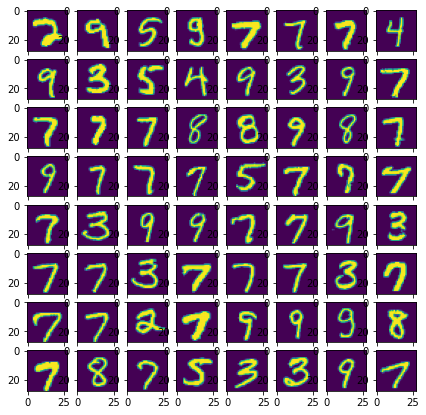

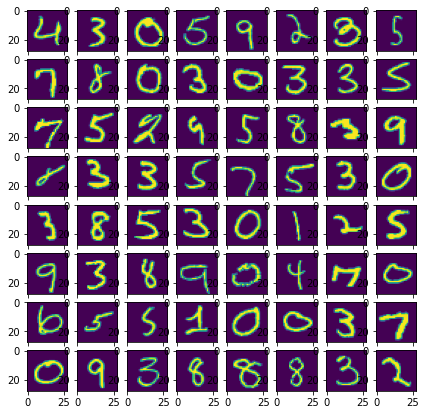

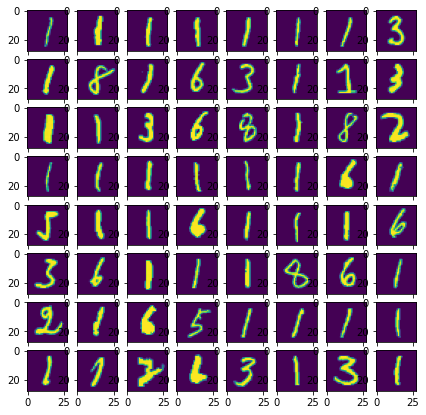

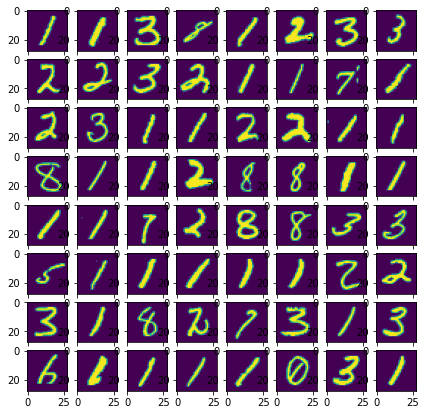

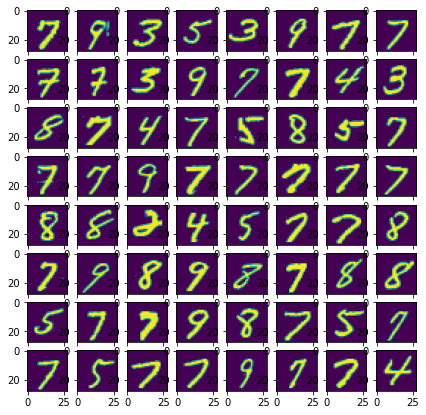

In [2]:
#Normalisation

X1 = x_train.reshape(len(x_train),-1)
y = y_train

x_train2=x_train[:10000]
X2=x_train2.reshape(len(x_train2),-1)

y=y_train[:10000]

X = X2.astype(float) / 255.0

print(len(X))
##

n_digits = 64

#pca = PCA(n_components=n_digits).fit(X)
#kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=4,
#                random_state=0)
#kmeans.fit(X)
#labels=kmeans.labels_
#print(kmeans.labels_)


kmeans = KMedoids(n_clusters=10)
kmeans.fit(X)


#kmedoids = MiniBatchKMedoids(n_clusters=n_digits, random_state=0).fit(X)
#kmedoids.labels_

#a=np.where(kmeans.labels_ == 1)


def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}
  
  for i in range(kmeans.n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)

    # append actual labels for each point in cluster
    labels.append(actual_labels[index])

    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    #print(labels)
    #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
  for i, cluster in enumerate(X_labels):
    for key, value in cluster_labels.items():
        if cluster in value:
            predicted_labels[i] = key
  return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:35])
print(y[:35])

clusterData=[]
for i in range(10):
  clusterData.append([])
for i in range(len(kmeans.labels_)):
  clusterData[kmeans.labels_[i]].append(x_train[i])
for l in range(10):
  print("Plotting for label %d" % (l))
  fig, axes = plt.subplots(nrows=8, ncols=8, sharex=True)
  fig.set_figheight(7)
  fig.set_figwidth(7)
  count = 0
  randomNoList = random.sample(clusterData[l], 64)
  for i in range(8):
    for j in range(8):
      axes[i][j].imshow(randomNoList[count])
      count += 1
  fig.savefig( 'kmeans_cluster' + str(l) + '.png')

0.25374625374625376


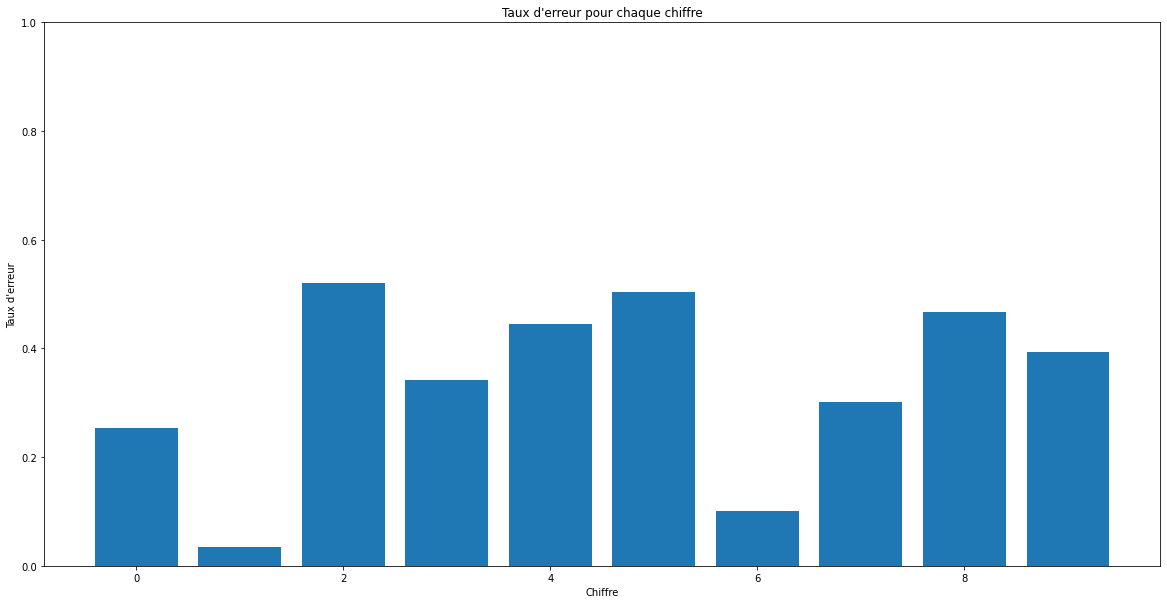

In [ ]:
def error_rate_per_digit(predicted_labels,y,chiffre):
  compteur=0
  error=0
  for i in range(len(predicted_labels)):
    if y[i] == chiffre:
      compteur+=1
      if y[i] != predicted_labels[i] :
        error+=1
  return error/compteur

def error_rate(predicted_labels,y):
  compteur=0
  error=0
  for i in range(len(predicted_labels)):
    compteur+=1
    if y[i] != predicted_labels[i] :
      error+=1
  return error/compteur

print(error_rate_per_digit(predicted_labels,y,0))

liste_error=[error_rate_per_digit(predicted_labels,y,i) for i in range(10)]

plt.figure(figsize=(20,10))
plt.bar([i for i in range(10)],liste_error)
plt.title("Taux d'erreur pour chaque chiffre")
plt.xlabel("Chiffre")
plt.ylabel("Taux d'erreur")
plt.ylim([0, 1])
plt.show()

### Visualisation des centroids

In [ ]:

centroids = kmeans.cluster_centers_

images = centroids.reshape(10, 28, 28)
images *= 255
images = images.astype(np.uint8)

cluster_labels = infer_cluster_labels(kmeans, y)

fig, axs = plt.subplots(1, 10, figsize = (20, 20))
plt.gray()

for i, ax in enumerate(axs.flat):
    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Cluster estimé : {}'.format(key))
    
    ax.matshow(images[i])
    ax.axis('off')
    
fig.show()

ValueError: ignored

### Evaluation du modèle

In [ ]:
from sklearn import metrics

ym=y.reshape(1,-1)
predicted_labelsm=predicted_labels.reshape(-1,1)
print(enumerate(y))

def calculate_metrics(estimator, labels):

    print('Number of Clusters : {}'.format(kmeans.n_clusters))
    print('Inertia : {}'.format(estimator.inertia_))
    print('Homogeneity : {}'.format(metrics.homogeneity_score(y,predicted_labels)))
    print('Accuracy : {}'.format(metrics.accuracy_score(y, predicted_labels)))
    ym=y.reshape(-1,1)
    print("Silhouette : {}\n".format(metrics.silhouette_score(ym,predicted_labels)))

calculate_metrics(kmeans,cluster_labels)


Number of Clusters : 15
Inertia : 76153.65088493042
Homogeneity : 0.299626626108714
Accuracy : 0.4262
Silhouette : -0.2029433313007814



[[5]
 [0]
 [4]
 ...
 [6]
 [9]
 [7]]
Accuracy: 0.2093
Accuracy: 0.3004
Accuracy: 0.3796
Accuracy: 0.4554
Accuracy: 0.4751
Accuracy: 0.5285
Accuracy: 0.5674
Accuracy: 0.5608
Accuracy: 0.5653
Accuracy: 0.5835
Accuracy: 0.6164
Accuracy: 0.6343
Accuracy: 0.6455


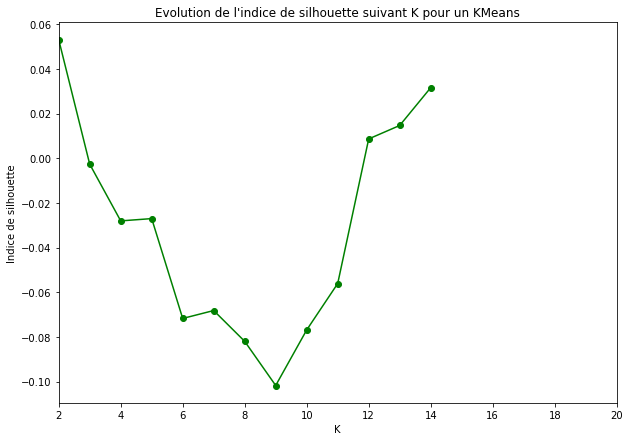

In [ ]:
clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
accuracy=[]
silhouettte=[]
inertia=[]
fit_time_list=[]



ym=y.reshape(-1,1)
print(ym)

for n_clusters in clusters:
    t0 = time()
    #pca = PCA(n_components=n_digits).fit(X)
    estimator = KMeans( n_clusters=n_clusters)
    estimator.fit(X)

    X_clusters = estimator.predict(X)
    cluster_labels = infer_cluster_labels(estimator, y)

    predicted_labels1 = infer_data_labels(X_clusters, cluster_labels)
    print('Accuracy: {}'.format(metrics.accuracy_score(y, predicted_labels1)))
    
    accuracy.append(metrics.accuracy_score(y, predicted_labels1))
    inertia.append(estimator.inertia_)
    silhouettte.append((metrics.silhouette_score(ym, predicted_labels1)))


plt.figure(figsize=(10,7))
plt.plot(clusters,silhouettte,marker='o',color="green")
plt.title("Evolution de l'indice de silhouette suivant K pour un KMeans")
plt.ylabel("Indice de silhouette")
plt.xlabel("K")
plt.xlim([2, 20])
#plt.ylim([0, 1])
plt.show()


## **Implémentation K-Means et K-Medoids**

1797
# digits: 2; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
random   	0.037s	100432	0.177	0.607	0.274	0.123	0.273	0.106
__________________________________________________________________________________
# digits: 3; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
random   	0.089s	93838	0.309	0.650	0.419	0.235	0.417	0.121
__________________________________________________________________________________
# digits: 4; # samples: 1797; # features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
random   	0.154s	89228	0.377	0.646	0.476	0.295	0.474	0.129
__________________________________________________________________________________
# digits: 5; # samp

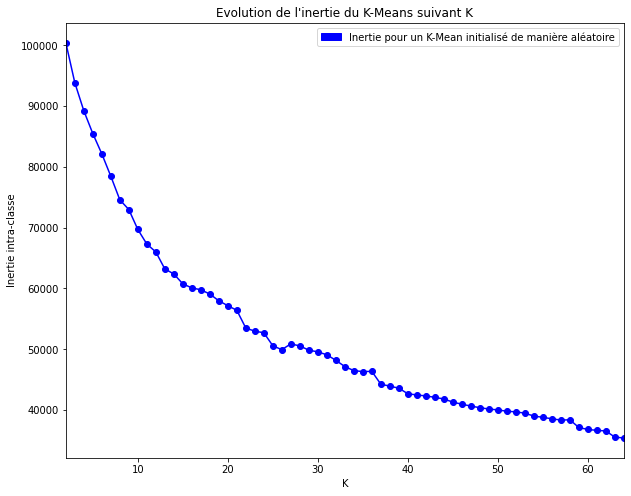

__________________________________________________________________________________


'plt.figure(figsize=(10,8))\nplt.scatter(range(2,13),silhouette,marker=\'o\',label="Valeur de la silhouette du k-mean pour k")\nplt.title("Evolution de la silhouette suivant k pour un Kmean")\nplt.ylabel("Silhouette")\nplt.xlabel("K")\nplt.ylim([0, 0.2])\nplt.xlim([2, 20])\nplt.show()\n\nplt.figure(figsize=(10,8))\nplt.scatter(range(2,13),inertia,marker=\'o\')\nplt.title("Evolution de l\'inertie suivant k pour un Kmean")\nplt.ylabel("Inertie")\nplt.xlabel("K")\nplt.xlim([2, 20])\nplt.show()\n\nplt.figure(figsize=(10,8))\nplt.scatter(range(2,13),fit_time_list,marker=\'o\')\nplt.title("Evolution du temps de convergence du K-Mean suivant k ")\nplt.ylabel("Temps de convergence en secondes")\nplt.xlabel("K")\nplt.xlim([2, 20])\nplt.ylim([0, 1])\nplt.show()\n\nplt.figure(figsize=(10,10))\nplt.scatter(range(2,13),accuracy,marker=\'o\')\nplt.title("Evolution de la précision suivant k pour un Kmean")\nplt.ylabel("Précision")\nplt.xlabel("K")\nplt.xlim([2, 20])\nplt.ylim([0, 1])\nplt.show()'

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



data, labels = x_train,y_train
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(len(data))

silhouette=[]
inertia=[]
fit_time_list=[]
accuracy=[]

def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    inertia.append(estimator[-1].inertia_)
    fit_time_list.append(fit_time)
    accuracy.append(metrics.accuracy_score(labels, estimator[-1].labels_))

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]
    silhouette.append(metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,))
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

def bench_k_medoids(kmedoids, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmedoids).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    inertia.append(estimator[-1].inertia_)
    fit_time_list.append(fit_time)
    accuracy.append(metrics.accuracy_score(labels, estimator[-1].labels_))

    # Define the metrics which require only the true labels and estimator
    # labels
    #clustering_metrics = [
    #    metrics.homogeneity_score,
    #    metrics.completeness_score,
    #    metrics.v_measure_score,
    #    metrics.adjusted_rand_score,
    #    metrics.adjusted_mutual_info_score,
    #]
    #results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    #results += [
    #    metrics.silhouette_score(data, estimator[-1].labels_,
    #                             metric="euclidean", sample_size=300,)
    #]
    silhouette.append(metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,))
    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    #print(formatter_result.format(*results))

plt.figure(figsize=(10,8))
plt.title("Evolution de l'inertie du K-Means suivant K")
'''
for i in range(2,65):
  print(
    f"# digits: {i}; # samples: {n_samples}; # features {n_features}"
)
  print(82 * '_')
  print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
  kmeans = KMeans(init="k-means++", n_clusters=i, n_init=4,
                random_state=0)
  bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)
  print(82 * '_')

plt.plot(range(2,65),fit_time_list,marker='o',label="Valeur de la silhouette du k-mean initialisé avec k-means++",color='green')
fit_time_list=[]'''

for i in range(2,65):
  print(
    f"# digits: {i}; # samples: {n_samples}; # features {n_features}"
)
  print(82 * '_')
  print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
  kmeans = KMeans(init="random", n_clusters=i, n_init=4, random_state=0)
  bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)
  print(82 * '_')


plt.plot(range(2,65),inertia,marker='o',label="Valeur de l'inertie' du k-mean initialisé aléatoirement",color='blue')
silhouette=[]
'''
for i in range(2,65):
  print(
    f"# digits: {i}; # samples: {n_samples}; # features {n_features}"
)
  print(82 * '_')
  print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
  kmedoids = KMedoids(metric="euclidean", n_clusters=i)
  bench_k_medoids(kmedoids=kmedoids, name="KMedoids", data=data, labels=labels)
  print(82 * '_')

plt.plot(range(2,65),fit_time_list,marker='o',label="Valeur de l'inertie' du k-medoids",color='orange')
fit_time_list=[]
'''
'''for i in range(2,65):
  print(
    f"# digits: {i}; # samples: {n_samples}; # features {n_features}"
)
  print(82 * '_')
  print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
  pca = PCA(n_components=i).fit(data)
  kmeans = KMeans(init=pca.components_, n_clusters=i, n_init=1)
  bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)
  print(82 * '_')

plt.plot(range(2,65),fit_time_list,marker='o',label="Valeur de l'inertie' du k-medoids",color='red')
'''
plt.ylabel("Inertie intra-classe")
plt.xlabel("K")
plt.xlim([2, 64])
#green_patch=mpatches.Patch(color='green', label="Temps de convergence pour un K-Means initialisé avec un k-means++")
#orange_patch=mpatches.Patch(color='orange', label="Temps de convergence pour un K-Medoids")
blue_patch= mpatches.Patch(color='blue', label="Inertie pour un K-Mean initialisé de manière aléatoire")
#red_patch = mpatches.Patch(color='red', label="Temps de convergence pour un K-Mean couplé à une PCA à composante i=K")
plt.legend(handles=[blue_patch])
plt.show()

  #kmedoids=KMedoids(n_clusters=i)
  
print(82 * '_')

##

'''plt.figure(figsize=(10,8))
plt.scatter(range(2,13),silhouette,marker='o',label="Valeur de la silhouette du k-mean pour k")
plt.title("Evolution de la silhouette suivant k pour un Kmean")
plt.ylabel("Silhouette")
plt.xlabel("K")
plt.ylim([0, 0.2])
plt.xlim([2, 20])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(range(2,13),inertia,marker='o')
plt.title("Evolution de l'inertie suivant k pour un Kmean")
plt.ylabel("Inertie")
plt.xlabel("K")
plt.xlim([2, 20])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(range(2,13),fit_time_list,marker='o')
plt.title("Evolution du temps de convergence du K-Mean suivant k ")
plt.ylabel("Temps de convergence en secondes")
plt.xlabel("K")
plt.xlim([2, 20])
plt.ylim([0, 1])
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(range(2,13),accuracy,marker='o')
plt.title("Evolution de la précision suivant k pour un Kmean")
plt.ylabel("Précision")
plt.xlabel("K")
plt.xlim([2, 20])
plt.ylim([0, 1])
plt.show()'''

## CNN

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_______________________________________________

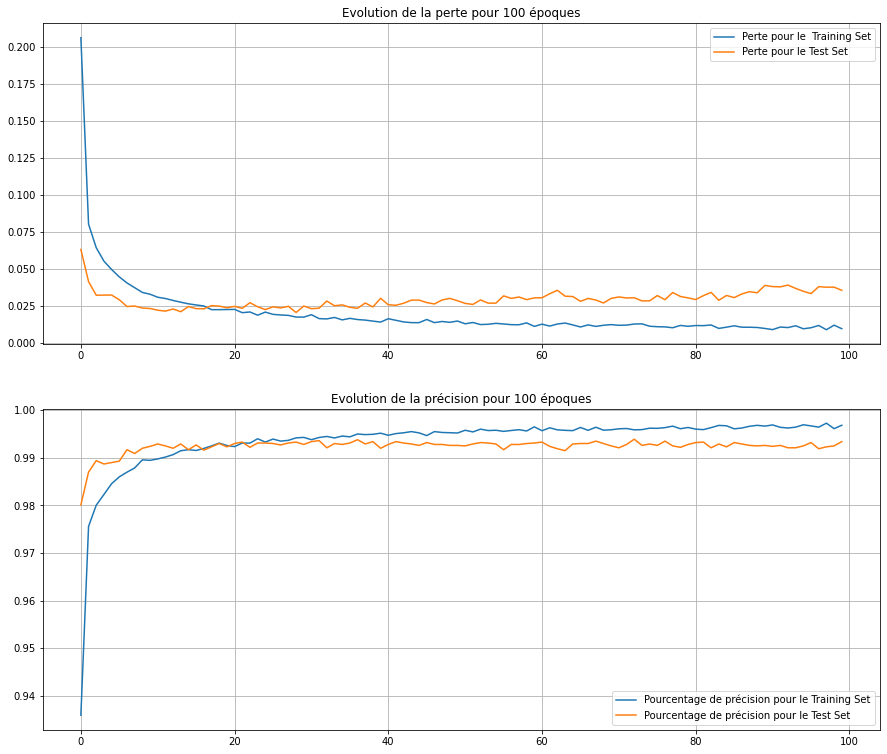

"\ntest_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))\ntest_dataset=test_dataset.batch(batch_size=1024)\n\noriginals = test_dataset.take(6)\noriginals_numpy = np.concatenate([x[1] for x in originals])\npredictions = model.predict(originals, verbose=True)\n\ny_true = np.argmax(originals_numpy, axis=-1)\ny_pred = np.argmax(predictions, axis=-1)\nconf = tf.math.confusion_matrix(y_true, y_pred, num_classes=10)\n\ndef plot_confusion_matrix(conf, classNames):\n    plt.figure(figsize=(10,10))\n    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.cool)\n    plt.title('Confusion Matrix for 10 epochs (CNN,batch=1024)')\n    plt.ylabel('True digits')\n    plt.xlabel('Predicted digits')\n    tick_marks = np.arange(len(classNames))\n    plt.xticks(tick_marks, classNames, rotation=45)\n    plt.yticks(tick_marks, classNames)\n    for i in range(len(classNames)):\n        for j in range(len(classNames)):\n            plt.text(j, i, str(int(conf[i][j])))\n    plt.show()\n    \nplo

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf


num_classes = 10
input_shape = (28, 28, 1)
CATEGORIES=["0","1","2","3","4","5","6","7","8","9"]


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Normalisation

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=True)

h = history.history

plt.figure(figsize = (15, 13))

plt.subplot(2,1,1)
plt.plot(history.epoch, h['loss'], label='Perte pour le  Training Set')
plt.plot(history.epoch, h['val_loss'], label='Perte pour le Test Set')
plt.title("Evolution de la perte pour 100 époques")
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.epoch, h['accuracy'], label='Pourcentage de précision pour le Training Set')
plt.plot(history.epoch, h['val_accuracy'], label='Pourcentage de précision pour le Test Set')
plt.title("Evolution de la précision pour 100 époques")
plt.grid(True)
plt.legend()
plt.show()

'''
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=True)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

print(evaluate_model(x_train,y_train,n_folds=5))

scores,histories=evaluate_model(x_train,y_train,n_folds=5)

def summarize_diagnostics(histories):
  plt.figure(figsize = (20, 17))
  for i in range(len(histories)):
		# plot loss
    plt.subplot(2, 1, 1)
    plt.title('Evolution de la fonction de perte après la validation croisée')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    blue_patch = mpatches.Patch(color='blue', label="Perte pour le Test Set")
    orange_patch = mpatches.Patch(color='orange', label="Perte pour le Training Set")
    plt.legend(handles=[orange_patch,blue_patch])
		# plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Précision de la classification après la validation croisée')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    blue_patch = mpatches.Patch(color='blue', label="Précision pour le Test Set")
    orange_patch = mpatches.Patch(color='orange', label="Précision pour le Training Set")
    plt.legend(handles=[orange_patch,blue_patch])
  plt.show()
 
summarize_diagnostics(histories)
'''
'''
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset=test_dataset.batch(batch_size=1024)

originals = test_dataset.take(6)
originals_numpy = np.concatenate([x[1] for x in originals])
predictions = model.predict(originals, verbose=True)

y_true = np.argmax(originals_numpy, axis=-1)
y_pred = np.argmax(predictions, axis=-1)
conf = tf.math.confusion_matrix(y_true, y_pred, num_classes=10)

def plot_confusion_matrix(conf, classNames):
    plt.figure(figsize=(10,10))
    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.cool)
    plt.title('Confusion Matrix for 10 epochs (CNN,batch=1024)')
    plt.ylabel('True digits')
    plt.xlabel('Predicted digits')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j, i, str(int(conf[i][j])))
    plt.show()
    
plot_confusion_matrix(conf, CATEGORIES)'''
 

## MLP

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


num_classes = 10
input_shape = 784
image_size=np.array(input_shape)
layers=2
CATEGORIES=["0","1","2","3","4","5","6","7","8","9"]


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## Normalisation

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(784,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

model=create_dense([32] * layers)

model.summary()

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=True)

h = history.history

plt.figure(figsize = (15, 13))

plt.subplot(2,1,1)
plt.plot(history.epoch, h['loss'], label='Perte pour le  Training Set')
plt.plot(history.epoch, h['val_loss'], label='Perte pour le Test Set')
plt.title("Evolution de la perte d'un MLP à 1 couche cachée pour 100 époques")
plt.xlabel("Epoques")
plt.ylabel("Valeur de la fonction de perte")
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.epoch, h['accuracy'], label='Pourcentage de précision pour le Training Test')
plt.plot(history.epoch, h['val_accuracy'], label='Pourcentage de précision pour le Test Set')
plt.title("Evolution de la précision d'un MLP à 1 couche cachée pour 100 époques")
plt.xlabel("Epoques")
plt.ylabel("Pourcentage de précision")
plt.grid(True)
plt.legend()
plt.show()

'''
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=True)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

print(evaluate_model(x_train,y_train,n_folds=5))

scores,histories=evaluate_model(x_train,y_train,n_folds=5)

def summarize_diagnostics(histories):
  plt.figure(figsize = (20, 17))
  for i in range(len(histories)):
		# plot loss
    plt.subplot(2, 1, 1)
    plt.title('Evolution de la fonction de perte après la validation croisée')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    blue_patch = mpatches.Patch(color='blue', label="Perte pour le Test Set")
    orange_patch = mpatches.Patch(color='orange', label="Perte pour le Training Set")
    plt.legend(handles=[orange_patch,blue_patch])
		# plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Précision de la classification après la validation croisée')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    blue_patch = mpatches.Patch(color='blue', label="Précision pour le Test Set")
    orange_patch = mpatches.Patch(color='orange', label="Précision pour le Training Set")
    plt.legend(handles=[orange_patch,blue_patch])
  plt.show()
 
summarize_diagnostics(histories)'''
'''
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset=test_dataset.batch(batch_size=1024)

originals = test_dataset.take(6)
originals_numpy = np.concatenate([x[1] for x in originals])
predictions = model.predict(originals, verbose=True)

y_true = np.argmax(originals_numpy, axis=-1)
y_pred = np.argmax(predictions, axis=-1)
conf = tf.math.confusion_matrix(y_true, y_pred, num_classes=10)

def plot_confusion_matrix(conf, classNames):
    plt.figure(figsize=(10,10))
    plt.imshow(conf, interpolation='nearest', cmap=plt.cm.cool)
    plt.title('Confusion Matrix for 10 epochs (MLP,batch=1024)')
    plt.ylabel('True digits')
    plt.xlabel('Predicted digits')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    for i in range(len(classNames)):
        for j in range(len(classNames)):
            plt.text(j, i, str(int(conf[i][j])))
    plt.show()
    
plot_confusion_matrix(conf, CATEGORIES)'''


x_train shape: (60000, 784)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
 703/1875 [==========>...................] - ETA: 2s - loss: 2.3363 - accuracy: 0.1257

KeyboardInterrupt: ignored